# Introduction to Python for Machine Learning

First Step: Install PyCharm and Anaconda




## Creating your Script File 
### Basic Python Syntax

Let's now look at the basic syntax of python. Like most programming languages, we can assign a value to our variable __a__ as follows. *NOTE:* semicolons aren't used like MATLAB to suppress output!

In [ ]:
a=1

If you want to see the output of a line of code you will need to use the __print()__ function

In [ ]:
print(a)

### Importing Numpy
The vast majority of the functions we need for this class will use the Numpy library

In [2]:
import numpy as np

To create matrices and vectors we need to use __np.array()__. 
We'll start with a 1x3 row vector and a 3x1 column vector

In [3]:
b = np.array( [[1,2,3]] ) 
c = np.array( [[1],[2],[3]] )

In [4]:
print(b)

[[1 2 3]]


In [5]:
print(c)

[[1]
 [2]
 [3]]


Similarly a 2x3 matrix can be created like this,

In [6]:
X = np.array([[4,5,6],[7,8,9]])
print(X)

[[4 5 6]
 [7 8 9]]


If you want to see the dimensions of a vector or matrix, use the __shape__ function. This is equivalent to the __size()__ function in MATLAB.

In [8]:
print(X.shape)

2


Now that we've created some vectors and matrices, we can access them similarly to MATLAB.
Python uses square brackets instead of parentheses.
NOTE: Python uses zero-based numbering (the first element is 0, not 1)

`X=[[4, 5, 6],
   [7, 8, 9]]`

In [9]:
print(X[0,0])

4


In [10]:
print(X[1,1])

8


In [11]:
print(X[0,:] )

[4 5 6]


In [12]:
print(X[:,1])

[5 8]


To make an array of length 10, counting up from 0, use the __range()__ function. This is equivalent to 0:9 in MATLAB.

In [13]:
print(range(10))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


If you want to create a vector or matrix of all ones just like the __ones()__ function in MATLAB, 

In [14]:
print(np.ones( (50,50) ))


[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


Let's now look at some basic matrix manipulation.
The __np.transpose()__ function computes the transpose of __X__, equivalent to __X'__ in MATLAB.

In [15]:
print( np.transpose(X))

[[4 7]
 [5 8]
 [6 9]]


In Python, using standard operations like (__*, /, +, -__) on matrices works element wise.

Equivalently in MATLAB we would run __X.*X__.

In [16]:
print(X*X)

[[16 25 36]
 [49 64 81]]


In [17]:
print(X+1)

[[ 5  6  7]
 [ 8  9 10]]


In [18]:
print(X+b)

[[ 5  7  9]
 [ 8 10 12]]


If we want to multiply two matrices together like __(X')*X__ in MATLAB, we'll need to use the __np.dot()__ function.

In [ ]:
print(np.dot(np.transpose(X),X))

More complicated functions can be found in the __Numpy__ documentation online.
One example is __np.linalg.eig()__

### For Loops, If Statements, and Custom Functions

Recall in MATLAB, a for loop would look like:

`count = 0;
for i=0:9
    count = count+1;
end
count`

In [ ]:
count = 0
for i in range(10):
    count = count+1
print(count)

MATLAB if statement:

`
if count==5
    "the count is 5"
elseif count <5
    "the count is less than 5"
else
    "the count is greater than 5"
end
`

In [ ]:
if count==5:
    print("the count is 5")
elif count <5:
    print("the count is less than 5")
else:
    print("the count is greater than 5")

MATLAB function:

`function z = myfunc(x,y)
    z=x+y;
end
myfunc(4,6)`

In [ ]:
def myfunc(x,y): 
    return x+y

print(myfunc(4,6))

### Loading The Digits Dataset

First make sure you have these four files in the same directory as your python script.

In [19]:
trainimages=np.load("trainimages.npy")
testimages=np.load("testimages.npy")
trainlabels=np.load("trainlabels.npy")
testlabels=np.load("testlabels.npy")

__trainimages__ is a (60,000x784) matrix containing all of the training images
__trainlabels__ is a (60,000x1) column vector containing all of the corresponding labels

### Plotting

We'll first need to import the __matplotlib__ package in order to use the plotting functions.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/ryanshiroma/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


To plot a digit like we've done in MATLAB with __imagesc()__, use the __plt.imshow()__ function 

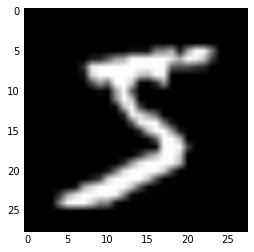

In [21]:
plt.figure() 
plt.imshow(trainimages[0].reshape(28,28),cmap=plt.gray())

In [22]:
print(trainlabels[0])

5


Now let's do a simple MATLAB style plot. Syntax is essentially the same as MATLAB

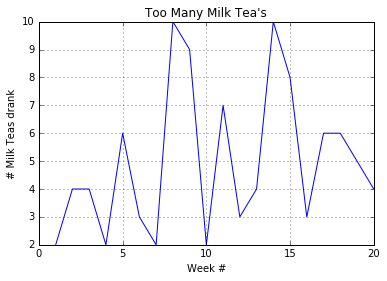

In [23]:
plt.figure()
x=range(1,21)
y=np.random.poisson(5,20)
plt.plot(x,y)
plt.xlabel("Week #")
plt.ylabel("# Milk Teas drank")
plt.title("Too Many Milk Tea's")
plt.grid()

### Running K-Nearest Neighbors on the dataset

Just like before, we'll need to import some libraries.
__Sklearn__ contains functions like knn, kmeans, pca, cross validation, etc.
__Timeit__ gives us functionality similar to the __tic()__ and __toc()__ functions in MATLAB

In [25]:
from sklearn import neighbors
from sklearn import metrics

import timeit

We can now run K-nearest neighbors on the digits dataset. *(The first 5000 digits in the training set)*

In [28]:
begin=timeit.default_timer()

mdl= neighbors.KNeighborsClassifier(n_neighbors=3,weights="uniform",n_jobs=2)
mdl.fit(trainimages[:5000], trainlabels[:5000])
pred=mdl.predict(testimages[:500])

score=1-metrics.accuracy_score(testlabels[:500],pred)

print("Error Rate: " + str(score))
print(str(timeit.default_timer()-begin)+ " seconds")

Error Rate: 0.082
2.38745307922 seconds


### Running PCA on the dataset

To speed up the K-NN computation time we'll need to reduce the dimensionality of the dataset.
*The code to use the SVD method on the dataset is in the script file*

In [27]:
from sklearn import decomposition

In [29]:
pca =  decomposition.PCA()
pca.fit(trainimages)

PCA(copy=True, n_components=None, whiten=False)

Within the __pca__ object, we can see the explained variance for each principal component.

In [30]:
S=pca.explained_variance_ratio_
print(S)

[  9.70463455e-02   7.09596872e-02   6.16915934e-02   5.38946688e-02
   4.86878268e-02   4.31228653e-02   3.27192284e-02   2.88388506e-02
   2.76201721e-02   2.35699285e-02   2.10918002e-02   2.02298816e-02
   1.71581116e-02   1.69210881e-02   1.57863703e-02   1.48294736e-02
   1.32456152e-02   1.27689969e-02   1.18725887e-02   1.15268975e-02
   1.06616141e-02   1.00671034e-02   9.53569263e-03   9.12539382e-03
   8.83404538e-03   8.39320291e-03   8.12575780e-03   7.86363985e-03
   7.44729675e-03   6.90858485e-03   6.58093952e-03   6.48148172e-03
   6.02613483e-03   5.86580345e-03   5.70019707e-03   5.43627469e-03
   5.05784014e-03   4.87858430e-03   4.81427833e-03   4.72265249e-03
   4.56745457e-03   4.44835145e-03   4.18500416e-03   3.98214022e-03
   3.84973781e-03   3.75102903e-03   3.62008298e-03   3.51590291e-03
   3.40056256e-03   3.21873114e-03   3.19016445e-03   3.12805432e-03
   2.95981462e-03   2.88955099e-03   2.84129265e-03   2.71434546e-03
   2.69519980e-03   2.58472189e-03

In [31]:
cumulative_var = np.cumsum(S)
cumulative_var = cumulative_var/cumulative_var[-1]
s = np.where(cumulative_var>0.95)[0][0]
print(s)

153


Now let's create our reduced dimension matrix using the __pca.transform()__ function and select only the first __s__ columns.

In [32]:
Y=pca.transform(trainimages)[:,:s]
Ytest=pca.transform(testimages)[:,:s]

We can now rerun K-NN on this reduced dataset

In [33]:
begin=timeit.default_timer()
mdl2= neighbors.KNeighborsClassifier(n_neighbors=3,weights="uniform",n_jobs=2)
mdl2.fit(Y[:5000],trainlabels[:5000])
pred=mdl2.predict(Ytest[:500])
score=1-metrics.accuracy_score(testlabels[:500],pred)
print(score)
print(str(timeit.default_timer()-begin)+ " seconds")

0.078
0.602170944214 seconds


## Extra Stuff

Another Sklearn function we can use is __KFold()__

In [34]:
from sklearn import cross_validation

k=2 Accuracy score:0.899493805182
k=3 Accuracy score:0.900995306684
k=4 Accuracy score:0.90249830669
k=5 Accuracy score:0.898494302686
k=6 Accuracy score:0.900500800201
k=7 Accuracy score:0.8949967932
k=8 Accuracy score:0.895990301679
5.98860692978 seconds


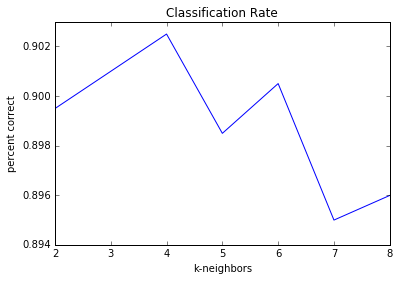

In [35]:
n=2000
k=8
kf = cross_validation.KFold(n=n, n_folds=6, shuffle=True)
error=np.zeros((k,1))
score=0

start = timeit.default_timer()

for k in range(2,k+1):
    for train_index, test_index  in kf:
        #WEIGHTING OPTIONS:linear_weights,'uniform', 'distance'
        classifier= neighbors.KNeighborsClassifier(k,weights="uniform",n_jobs=2)
        classifier.fit(Y[train_index], trainlabels[train_index])
        pred=classifier.predict(Y[test_index])
        score+=metrics.accuracy_score(trainlabels[test_index],pred)
    score/=6
    print("k="+str(k) + " Accuracy score:" +str(score))
    error[k-1]=score
    score=0

stop = timeit.default_timer()
print str(stop-start) +" seconds"

plt.plot(range(2,k+1), error[1:])
plt.title("Classification Rate")
plt.xlabel("k-neighbors")
plt.ylabel("percent correct")
plt.show()

More code is available in the script file posted in the shared drive.